<a href="https://colab.research.google.com/github/RIZ10000/ML/blob/master/Experiment/EXP_09_J047_140920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class_columns=["A","B","C","D","E","AD","DE","LD","FS","SUSP"]

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving CTG.csv to CTG.csv


{'CTG.csv': b'LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP\r\n120,0,0,0,0,0,0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,9,2\r\n132,0.006379585,0,0.006379585,0.003189793,0,0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,6,1\r\n133,0.003322259,0,0.008305648,0.003322259,0,0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,6,1\r\n134,0.002560819,0,0.007682458,0.002560819,0,0,16,2.4,0,23,117,53,170,11,0,137,134,137,13,1,6,1\r\n132,0.006514658,0,0.008143322,0,0,0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,2,1\r\n134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,0,150,50,200,5,3,76,107,107,170,0,8,3\r\n134,0.001402525,0,0.012622721,0.008415147,0,0.002805049,29,6.3,0,0,150,50,200,6,3,71,107,106,215,0,8,3\r\n122,0,0,0,0,0,0,83,0.5,6,15.6,68,62,130,0,0,122,122,123,3,1,9,3\r\n122,0,0,0.001517451,0,0,0,84,0.5,5,13.6,68,62,130,0,0,122,122,123,3,1,9,3\r\n122,0,0,0.002967359,0,0,0,86,0.3,6,10.6,68,62,130,1,0,122,122,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CTG.csv")

In [3]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,9,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,6,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,6,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,6,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,2,1


In [4]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [6]:
X = data.drop(["CLASS","NSP"],axis=1)
Y1 = data["CLASS"]
Y2 = data["NSP"]

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [8]:
Y1 = le.fit_transform(Y1)
Y2 = le.fit_transform(Y2)

In [9]:
from keras.utils import to_categorical
Y1 = to_categorical(Y1)
Y2 = to_categorical(Y2)

In [10]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test =train_test_split( X, Y1, test_size = 0.2, random_state = 27)
X2_train,X2_test,Y2_train,Y2_test =train_test_split( X, Y2, test_size = 0.2, random_state = 27)

In [11]:
from keras import layers
from keras import models

In [12]:
nn1=models.Sequential()

In [13]:
nn1.add(layers.Dense(512,activation="relu",input_dim=X1_train.shape[1]))
nn1.add(layers.Dense(256,activation="relu",))
nn1.add(layers.Dense(128,activation="relu",))
nn1.add(layers.Dense(64,activation="relu",))
nn1.add(layers.Dense(32,activation="relu",))
nn1.add(layers.Dense(Y1_train.shape[1],activation="softmax"))

In [14]:
nn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               11264     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 186,154
Trainable params: 186,154
Non-trainable params: 0
__________________________________________________

In [15]:
nn1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
History1 = nn1.fit(X1_train,Y1_train,epochs=500,batch_size=128,validation_split=0.25)

Epoch 1/500
10/10 [==============================] - 0s 29ms/step - loss: 5.6196 - accuracy: 0.2353 - val_loss: 2.2781 - val_accuracy: 0.1553
Epoch 2/500
10/10 [==============================] - 0s 9ms/step - loss: 2.1189 - accuracy: 0.3184 - val_loss: 2.0258 - val_accuracy: 0.4094
Epoch 3/500
10/10 [==============================] - 0s 9ms/step - loss: 1.7141 - accuracy: 0.4384 - val_loss: 1.6754 - val_accuracy: 0.4235
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 1.4996 - accuracy: 0.4471 - val_loss: 1.4706 - val_accuracy: 0.4776
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 1.4339 - accuracy: 0.4651 - val_loss: 1.3763 - val_accuracy: 0.5012
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 1.3221 - accuracy: 0.5286 - val_loss: 1.3538 - val_accuracy: 0.4565
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 1.3055 - accuracy: 0.5176 - val_loss: 1.2660 - val_accuracy: 0.5082
Epoch 8/500


In [17]:
test_loss1,test_acc1=nn1.evaluate(X1_test,Y1_test)

14/14 [==============================] - 0s 2ms/step - loss: 1.3432 - accuracy: 0.7535


In [18]:
print(test_loss1)
print(test_acc1)

1.3432366847991943
0.7535211443901062


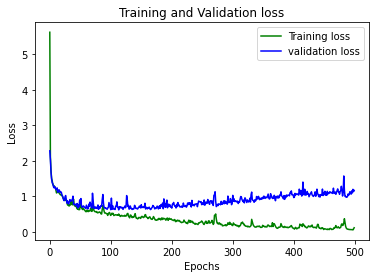

In [19]:
  loss_train = History1.history['loss']
  loss_val = History1.history['val_loss']
  epochs = range(500)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

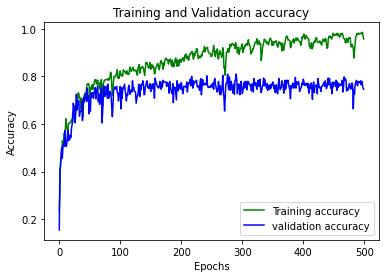

In [20]:
  acc_train = History1.history['accuracy']
  acc_val = History1.history['val_accuracy']
  epochs = range(500)
  plt.plot(epochs, acc_train, 'g', label='Training accuracy')
  plt.plot(epochs, acc_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [21]:
nn2=models.Sequential()

In [22]:
nn2.add(layers.Dense(512,activation="relu",input_dim=X2_train.shape[1]))
nn2.add(layers.Dense(256,activation="relu",))
nn2.add(layers.Dense(128,activation="relu",))
nn2.add(layers.Dense(64,activation="relu",))
nn2.add(layers.Dense(32,activation="relu",))
nn2.add(layers.Dense(Y2_train.shape[1],activation="softmax"))

In [23]:
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               11264     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 185,923
Trainable params: 185,923
Non-trainable params: 0
________________________________________________

In [24]:
nn2.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
History2 = nn2.fit(X2_train,Y2_train,epochs=500,batch_size=128,validation_split=0.25)

Epoch 1/500
10/10 [==============================] - 0s 25ms/step - loss: 3.6027 - accuracy: 0.6031 - val_loss: 1.0334 - val_accuracy: 0.7906
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.7395 - accuracy: 0.7639 - val_loss: 0.4570 - val_accuracy: 0.8376
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4726 - accuracy: 0.8157 - val_loss: 0.4441 - val_accuracy: 0.8400
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.4012 - accuracy: 0.8486 - val_loss: 0.3729 - val_accuracy: 0.8729
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3829 - accuracy: 0.8620 - val_loss: 0.3550 - val_accuracy: 0.8824
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 0.4080 - accuracy: 0.8392 - val_loss: 0.4009 - val_accuracy: 0.8706
Epoch 7/500
10/10 [==============================] - 0s 9ms/step - loss: 0.3909 - accuracy: 0.8502 - val_loss: 0.4209 - val_accuracy: 0.8565
Epoch 8/500


In [26]:
test_loss2,test_acc2=nn2.evaluate(X2_test,Y2_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.8920


In [27]:
print(test_loss2)
print(test_acc2)

0.7204607129096985
0.8920187950134277


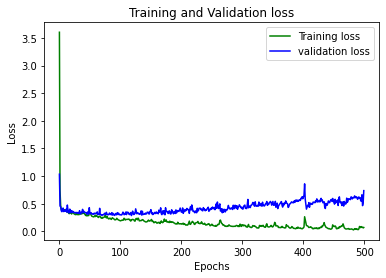

In [28]:
  loss_train = History2.history['loss']
  loss_val = History2.history['val_loss']
  epochs = range(500)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

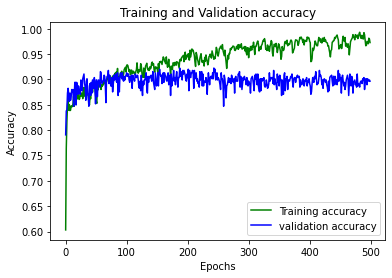

In [29]:
  acc_train = History2.history['accuracy']
  acc_val = History2.history['val_accuracy']
  epochs = range(500)
  plt.plot(epochs, acc_train, 'g', label='Training accuracy')
  plt.plot(epochs, acc_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()